In [1]:
import sqlite3

# Connect (creates db file if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ("Apples", 10, 2.5),
    ("Apples", 5, 2.5),
    ("Bananas", 8, 1.2),
    ("Bananas", 12, 1.2),
    ("Oranges", 6, 3.0),
    ("Oranges", 4, 3.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# SQL Query: total quantity + revenue
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Print results
print("Sales Summary:")
print(df)


Sales Summary:
   product  total_qty  revenue
0   Apples         15     37.5
1  Bananas         20     24.0
2  Oranges         10     30.0


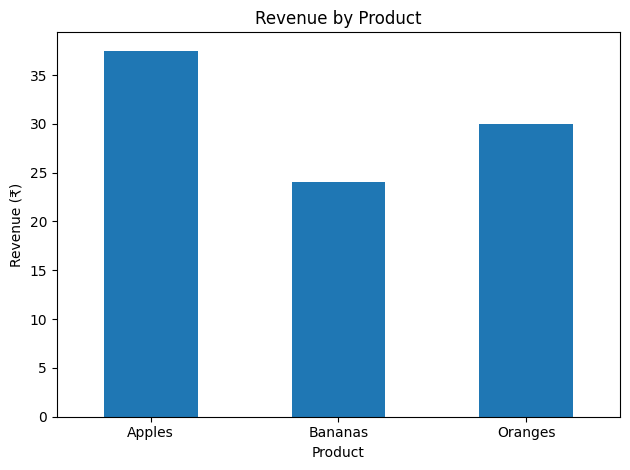

In [3]:
# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save chart
plt.show()


In [4]:
import os

print(os.listdir())  # List all files in current folder


['.config', 'sales_chart.png', 'sales_data.db', 'sample_data']


In [5]:
from google.colab import files

# Download the database
files.download("sales_data.db")

# Download the chart
files.download("sales_chart.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>